In [11]:
from base import np
import pandas as pd

import importlib
import threeD
importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../Figures/FluxMap3D/"

In [12]:
def shell_generator(r0, l):
    'Define the inner step function that takes r as parameter'
    def c_shell(r):
        'Determine the condition based on r0 and l'
        cond = (r >= r0) & (r <= r0 + l)
        c = 3/(4*np.pi) * 1/(l**3 + 3 * l**2 * r0 + 3 * l * r0**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_shell

#### Extract Real Numbers from Excel

In [13]:
# Load the Excel file
bionums_df = pd.read_excel('Real_Numbers.xlsx')

# Real Diatom Radii (w std) 
bionums_df['R_d (μm)'] = bionums_df['L_d (μm)'].values/2
bionums_df['σR_d'] = bionums_df['σL_d'].values/2

# Real Bacteria Radii (w std)
bionums_df['R_b (μm)'] = bionums_df['L_b (μm)'].values/2
bionums_df['σR_b'] = bionums_df['σL_b'].values/2

bionums_df

,Diatom,Diatom Length,L_d (μm),σL_d,Bacteria,Bacteria Length,L_b (μm),σL_b,Interaction Source,Diatom Length Source,Bacterial Length Source,R_d (μm),σR_d,R_b (μm),σR_b
0,Asterionellopsis glacialis,30 – 150 μm in length,90,60,Alteromonas macleodii,1.4–2 µm long,1.70,0.30,Residence time of a Brownian particle in a che...,EOS - Phytoplankton Encyclopedia Project,Microbe Profile: Alteromonas macleodii | Micro...,45.0,30.0,0.850,0.150
1,Thalassiosira weissflogii,4 – 32 µm in diameter,18,14,Marinobacter adhaerens,1.7-2.4 µm in length,2.05,0.35,Chemotaxis of Marinobacter adhaerens and its i...,Species Profile - Thalassiosira weissflogii,Marinobacter adhaerens HP15 | BacDive,9.0,7.0,1.025,0.175


#### Set the System's Parameters as a function of the Diatom Radius

In [14]:
syst_params_func = lambda R_dtm : {
    # Space Boundaries
    'R_dtm' : R_dtm, 'R_inf' : 1000*R_dtm,
    # Max Bacterial Boundary
    'L' : 3*R_dtm,
    # 'alpha': None,
    # Number of points
    'nr': 1_000_000,
    'n_rho': 250,
    'n_lambda': 250
}
SOLVE_SYSTEM = True

### 1. *Asterionellopsis glacialis* diatom & *Alteromonas macleodii* bacteria

In [15]:
# Extract the first row of the DataFrame
bionums = bionums_df.iloc[0]
R_d = bionums['R_d (μm)']
R_b = bionums['R_b (μm)']
R_bmax = bionums['R_b (μm)'] + bionums['σR_b']
label_d = bionums['Diatom']
label_b = bionums['Bacteria']

ODEs solved: 100%|██████████| 31126/31126 [1:07:54<00:00,  7.64it/s]


Diatom: Asterionellopsis glacialis
Diatom Radius: 45.0
Bacterium Radius: 0.85 ± 0.15


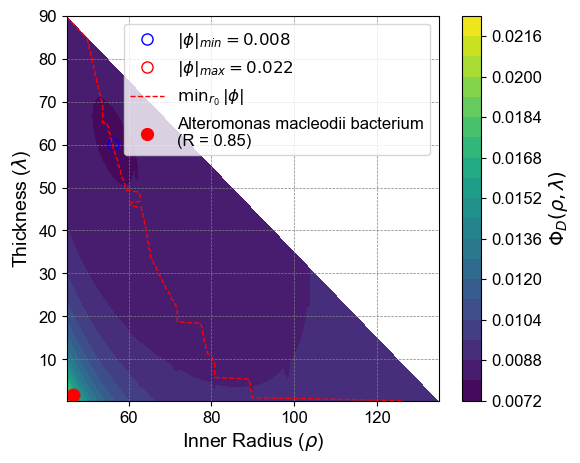

In [16]:
syst_params = syst_params_func(int(R_d))
syst_params['T_ratio'] = 1e0

filename = f'c_shell(r)_{label_d.replace(" ", "_")}'

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data(filename)
else:
    FM.load_data(filename)
FM.plot(flux_range=False, set_extremes=True, set_transition=True)

print(f'Diatom: {label_d}')

FM.ax.scatter(
    FM.x_values[4], FM.y_values[4], color='red', s=R_b**2 * 100,
    label=f'{label_b} bacterium\n(R = {R_b})'
    )

FM.ax.scatter(
    FM.x_values[4], FM.y_values[4], color= 'red', s=R_bmax**2 * 100,
    alpha=0.3
    )
FM.ax.legend()

print(f'Diatom Radius: {R_d}')
print(f'Bacterium Radius: {R_b} ± {bionums["σR_b"]}')

#### Now, $R_d = 20$ μm

In [17]:
R_d = 20 # bionums['R_d (μm)']

In [18]:
# syst_params = syst_params_func(int(R_d))
# syst_params['alpha'] = 1e2

# filename = f'c_shell(r)_{label_d.replace(" ", "_")}_R_d={R_d}'

# FM = FluxMap3D(syst_params, shell_generator)
# FM.solve(n_jobs=-1)
# FM.title += f'\n for {label_d}'
# FM.plot()
# FM.ax.scatter(
#     FM.x_values[4], FM.y_values[4], color='red', s=R_b**2 * 100,
#     label=f'{label_b} bacterium\n(R = {R_b})'
#     )
# FM.ax.scatter(
#     FM.x_values[4], FM.y_values[4], color= 'red', s=R_bmax**2 * 100,
#     alpha=0.3
#     )
# FM.ax.legend()

# print(f'Diatom Radius: {R_d}')
# print(f'Bacterium Radius: {R_b} ± {bionums["σR_b"]}')

### *Thalassiosira weissflogii* diatom & *Marinobacter adhaerens* bacteria

In [19]:
bionums = bionums_df.iloc[1]
R_d = bionums['R_d (μm)']
R_b = bionums['R_b (μm)']
R_bmax = bionums['R_b (μm)'] + bionums['σR_b']
label_d = bionums['Diatom']
label_b = bionums['Bacteria']

ODEs solved: 100%|██████████| 31126/31126 [45:07<00:00, 11.49it/s]  


Diatom: Thalassiosira weissflogii
Diatom Radius: 9.0
Bacterium Radius: 1.025 ± 0.175


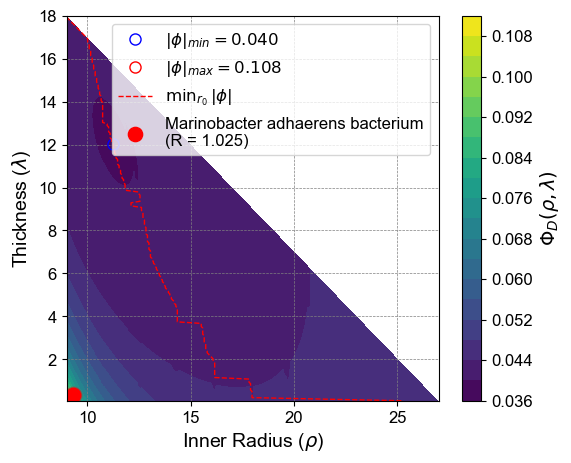

In [20]:
syst_params = syst_params_func(int(R_d))
syst_params['T_ratio'] = 1e0

filename = f'c_shell(r)_{label_d.replace(" ", "_")}'

FM = FluxMap3D(syst_params, shell_generator)
if SOLVE_SYSTEM:
    FM.solve(n_jobs=-1)
    FM.save_data(filename)
else:
    FM.load_data(filename)
FM.plot(flux_range=False, set_extremes=True, set_transition=True)
print(f'Diatom: {label_d}')

FM.ax.scatter(
    FM.x_values[4], FM.y_values[4], color='red', s=R_b**2 * 100,
    label=f'{label_b} bacterium\n(R = {R_b})'
    )
FM.ax.scatter(
    FM.x_values[4], FM.y_values[4], color= 'red', s=R_bmax**2 * 100,
    alpha=0.3
    )
FM.ax.legend();

print(f'Diatom Radius: {R_d}')
print(f'Bacterium Radius: {R_b} ± {bionums["σR_b"]}')